<a href="https://colab.research.google.com/github/DmitryKostin/yandex-praktikum-data-analyst/blob/main/05_module_project_1/module_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование рынка видеоигр

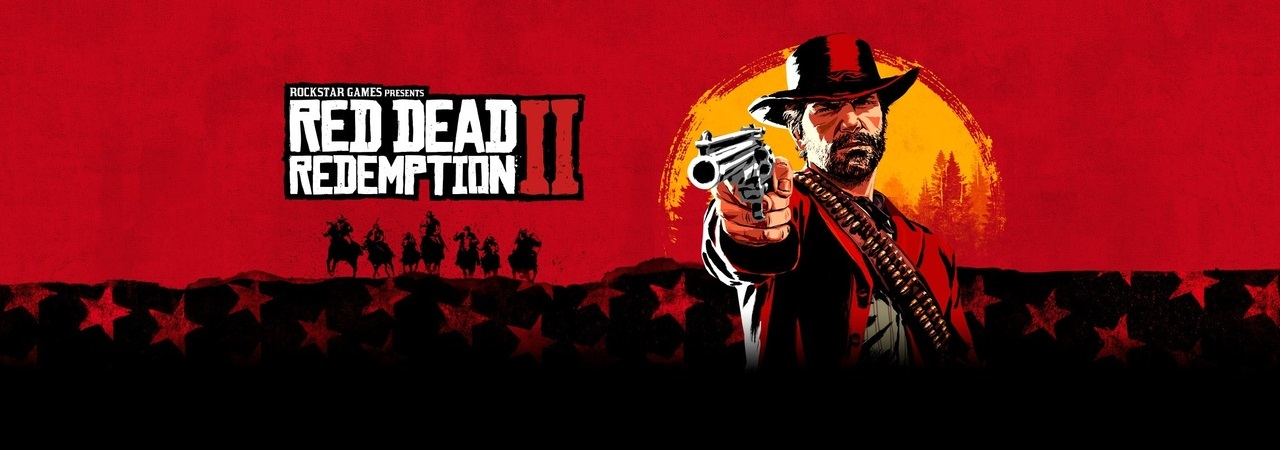

**Содержание** <a class='anchor' id='table_of_contents'></a>

* [Описание проекта](#description)
* [Описание данных](#data)
* [Шаг 1. Загрузка данных и изучение общей информации](#step_1)
* [Шаг 2. Предобработка данных](#step_2)
* [Шаг 3. Исследовательский анализ данных](#step_3)
    * [Выпуск игр в различные годы](#step_3_1)
    * [Анализ продаж платформ и определение их жизненного срока](#step_3_2)
    * [Определение актуального периода](#step_3_3)
    * [Определение потенциально прибыльных платформ](#step_3_4)
    * [Диаграмма размаха глобальных продаж игр в разбивке по платформам](#step_3_5)
    * [Анализ зависимости между отзывами и продажами](#step_3_6)
    * [Анализ зависимости между отзывами и продажами других платформ](#step_3_7)
    * [Анализ прибыльности жанров](#step_3_8)
* [Шаг 4. Портреты регионов](#step_4)
    * [Самые популярные платформы (топ-5)](#step_4_1)
    * [Самые популярные жанры (топ-5)](#step_4_2)
    * [Влияние рейтинга ESRB на продажи в отдельном регионе](#step_4_3)
* [Шаг 5. Проверка гипотез](#step_5)
    * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#step_5_1)
    * [Средние пользовательские рейтинги жанров Action и Sports разные](#step_5_2)
* [Выводы](#final)

## Описание проекта <a class='anchor' id='description'></a>

**Цель проекта** - выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Исходные данные** - исторические данные о продажах игр в период 1980-2016 гг., оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных <a class='anchor' id='data'></a>

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

[Назад к содержанию](#table_of_contents)

## Шаг 1. Загрузка данных и изучение общей информации <a class='anchor' id='step_1'></a>

Загрузим необходимые для анализа библиотеки и дополнительные функции.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

sns.set_theme(style="darkgrid")
pd.set_option('mode.chained_assignment', None)

In [2]:
# функция для подсчета дубликатов и получения общих сведений о датасете
def get_info(data):
    display(data.head())
    print()
    print('Число дубликатов:', data.duplicated().sum())
    print()
    data.info()

In [3]:
# функция для подсчета доли пропусков
def get_na(data):
    na_info = (
        pd.DataFrame(data.isna().mean())
        .rename(columns={0: 'NaN'})
        .style
        .set_caption('Доля пропусков')
        .background_gradient('coolwarm')
        .format('{:.2%}')
        )
    return na_info

Загрузим и осмотрим датасет проекта.

In [4]:
data = pd.read_csv('games.csv')

In [5]:
get_info(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



Число дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Как мы видим, датафрейм содержит 16 715 строк. Из 11 столбцов 6 имеют тип float64 - числа с плавающей точкой, остальные 5 имеют строковые данные. В последних трех столбцах заметно значительное количество пропусков. Исследуем их подробнее.

Как мы видим, явных дубликатов строк в данных нет.

In [6]:
get_na(data)

,NaN
Name,0.01%
Platform,0.00%
Year_of_Release,1.61%
Genre,0.01%
NA_sales,0.00%
EU_sales,0.00%
JP_sales,0.00%
Other_sales,0.00%
Critic_Score,51.32%
User_Score,40.09%


Больше всего пропусков (более 40%) наблюдается в столбцах, содержащих данные о рейтинге и оценках игр. Незначительное количество пропусков (1.6%) содержит столбец с данными о годе выпуска игры. Постараемся снизить это количество на этапе предобработки.

[Назад к содержанию](#table_of_contents)

## Шаг 2. Предобработка данных <a class='anchor' id='step_2'></a>

Прежде чем начать предобработку датафрейма, приведем названия его столбцов в нижний регистр.

In [7]:
data.columns = data.columns.str.lower()

В столбцах `name` и `genre` было по 2 пропуска. Взглянем, что это за строки.

In [8]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как мы видим, пропуски столбцов содержатся в одних и тех же строках - удалим их из датафрейма.

In [9]:
data.dropna(subset=['name'], inplace=True)

Далее, рассмотрим пропуски столбца `year_of_release`. 

In [10]:
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски содержат 269 строк, и как видно, некоторые игры содержат в своем названии год выпуска - например, FIFA Soccer 2004. Попробуем на основании этой информации заполнить часть пропусков.

Предварительно, для выполнения последующей проверки сохраним индексы строк с пропусками.

In [11]:
isna_indices = data.loc[data['year_of_release'].isna()].index

Создадим список лет `years` из интервала 2000-2016 гг., последние 2 числа которых будем искать в строках названий игр. В случае нахождения такого числа в названии, запишем в столбце `year_of_release` полную цифру года, сделав конкатенацию строк. (например, '20' + '01' -> '2001'). Также, дополнительно создадим словарь `k_years` с редкими обозначениями лет, которые будем менять через ключ и его значение.

In [12]:
years = ['0' + str(i) for i in range(1, 10)] + [str(i) for i in range(10, 17)]
k_years = {'2K6': 2006, 
           '2K8': 2008}
print(years)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']


Запустим цикл, итерируясь по индексам и строкам, и заполним часть пропусков, подходящих условиям.

In [13]:
for index, row in data.iterrows():
    if pd.isna(row['year_of_release']):
        for i in years:
            if i in row['name']:
                data.loc[index, 'year_of_release'] = '20' + i
        for j in k_years:
            if j in row['name']:
                data.loc[index, 'year_of_release'] = k_years[j]

Проверим, корректно ли заполнились пропуски столбца `year_of_release`.

In [14]:
data.loc[isna_indices, :].loc[~(data['year_of_release'].isna()), :].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2004,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,2006,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,2003,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2479,Madden NFL 07,PSP,2007,Sports,0.77,0.03,0.00,0.04,78.0,6.6,E
2492,MLB SlugFest 20-03,PS2,2003,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2572,PES 2009: Pro Evolution Soccer,PSP,2009,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
2849,Madden NFL 11,Wii,2011,Sports,0.68,0.00,0.00,0.04,75.0,5.4,E
3413,Madden NFL 06,X360,2006,Sports,0.54,0.00,0.01,0.03,74.0,4.9,E
3486,Madden NFL 2002,XB,2002,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E


Как мы видим, часть пропусков была корректно заполнена соответствующими значениями года выпуска игры.

In [15]:
data.isna().sum()

name                  0
platform              0
year_of_release     244
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Количество пропусков в столбце `year_of_release` снизилось с 269 до 244. Оставшиеся строки с пропусками удалим из датафрейма. Их количество не превышает 1% данных, что не критично для дальнейшего анализа.

In [16]:
data.dropna(subset=['year_of_release'], inplace=True)

После удаления пропусков можно изменить тип данных столбца `year_of_release` на целочисленный.

In [17]:
data['year_of_release'] = data['year_of_release'].astype('int32')

Рассмотрим столбец `user_score`, который содержит оценки пользователей. Как нам известно, в столбце содержатся значения "tbd", что означает "to be determined" - информация требует определения. Рассмотрим, сколько пропусков и значений содержит столбец.

In [18]:
print('Количество заполненных строк:', data['user_score'].notna().sum())
print('Количество пропусков:', data['user_score'].isna().sum())
print('Всего строк:', len(data))

Количество заполненных строк: 9859
Количество пропусков: 6610
Всего строк: 16469


Посмотрим, сколько строк с "tbd" содержит столбец.

In [19]:
len(data[data['user_score'] == 'tbd']) # 2380

2380

Датафрейм содержит 2 380 строк со значением "tbd" (14% столбца) - предлагаем заполнить его пропуском `NaN`.

In [20]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

Посмотрим, как изменилось соотношение пропусков и значений в столбце.

In [21]:
print('Количество заполненных строк:', data['user_score'].notna().sum())
print('Количество пропусков:', data['user_score'].isna().sum())
print('Всего строк:', len(data))

Количество заполненных строк: 7479
Количество пропусков: 8990
Всего строк: 16469


Столбец больше не содержит строковых значений и теперь его можно привести к нужному типу `float` - числа с плавающей точкой.

In [22]:
data['user_score'] = data['user_score'].astype('float')

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`.

In [23]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [24]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Рассмотрим категории рейтинга.

In [25]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим пропуски на категорию "other".

In [26]:
data['rating'] = data['rating'].fillna('other')

Устраним выбросы платформы Nintendo DS. Как известно, консоль вышла в 2004 году, но в датафрейме имеются данные за 1985 год. Отфильтруем все, что до 2004 года.

In [27]:
data[(data['platform'] == 'DS') & (data['year_of_release'] < 2004)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,other,0.02


Удалим данную строку через индекс.

In [28]:
data = data.drop(15957)

[Назад к содержанию](#table_of_contents)

## Шаг 3. Исследовательский анализ данных <a class='anchor' id='step_3'></a>

### 3.1. Выпуск игр в различные годы <a class='anchor' id='step_3_1'></a>

Посмотрим, сколько игр выпускалось в разные годы и определим, важны ли данные за все периоды.

Рассмотрим распределение продаж игр по годам в период 1980-2016 гг.

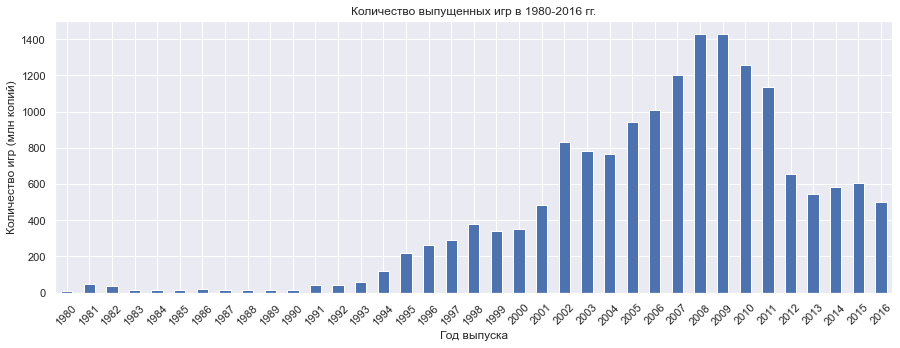

In [29]:
data.groupby('year_of_release')['name'].agg('count').plot(kind='bar', figsize=(15,5), rot=45)
plt.title('Количество выпущенных игр в 1980-2016 гг.')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр (млн копий)');

Как видно из графика, наибольший пик выпуска игр приходился на период 2005-2011 гг. После 2011 года заметен существенный спад производства. Возможно, это связано с развитием игровой индустрии: создание игр становится все более трудоемким и финансово затратным производством, развитие технологий и графики позволяет делать игры более технически сложными - вместе с этим, игр становится меньше, процесс разработки удлиняется, но их качество возрастает.

Для анализа нам не требуются все периоды датафрейма - только лишь актуальный период, который отражает современные тенденции игровой индустрии. В развитии консолей наблюдается цикличность и сменяемость поколений - начиная с 2013 года, на рынок выходит новое поколение консолей, таких как PlayStation 4 и Xbox 360. Для остальных платформ еще могут выпускаться игры, однако, их официальная продажа в основном прекращена и можно сказать, что они устарели. 

[Назад к содержанию](#table_of_contents)

### 3.2. Анализ продаж платформ и определение их жизненного срока <a class='anchor' id='step_3_2'></a>

Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Определим, за какой характерный срок появляются новые и исчезают старые платформы.

Посмотрим на платформы с наибольшими суммарными продажами игр в мире.

In [30]:
top_list = pd.pivot_table(data, index='platform', 
                                values='total_sales', 
                                aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
top_list['%'] = round((top_list['total_sales'] / top_list['total_sales'].sum() * 100), 2)
top_list.head(10)

,platform,total_sales,%
16,PS2,1248.37,14.13
28,X360,961.88,10.89
17,PS3,931.34,10.54
26,Wii,892.37,10.10
4,DS,802.77,9.09
15,PS,727.58,8.24
18,PS4,314.14,3.56
6,GBA,312.88,3.54
19,PSP,291.33,3.30
2,3DS,257.81,2.92


Как видим, наибольшая часть продаж игр принадлежит консоле PlayStation 2. Нанесем данные сводной таблицы на график.

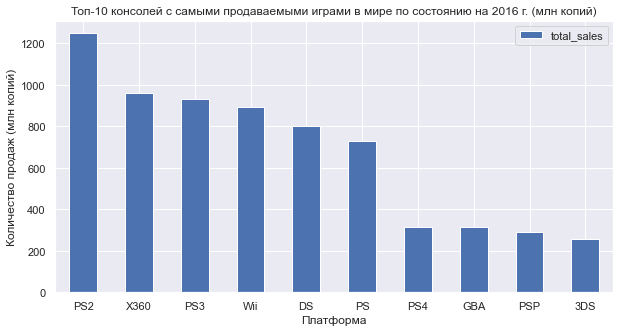

In [31]:
top_list.head(10).plot(kind='bar', 
                       x='platform', 
                       y='total_sales', figsize=(10,5), rot=0, 
                       title='Топ-10 консолей c самыми продаваемыми играми в мире по состоянию на 2016 г. (млн копий)')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж (млн копий)');

В список топ-10 консолей c самыми продаваемыми играми в мире по состоянию на 2016 г. попали продукты компании Sony (PlayStation, PlayStation 2, PlayStation 3, PlayStation 4), Microsoft (Xbox 360) и Nintendo (Wii, DS, 3DS, Game Boy Advanced).

Лидерство принадлежит компании Sony: 
 - PlayStation 2 - для консоли продано 1 248 млн копий игр, что является максимумом среди всех конкурентов и составляет 14% среди всех проданных игр;
 - суммарная доля продаж всех консолей компании Sony составляет около 40% (более 3 512 млн копий игр для консолей PlayStation c 1994 по 2016 гг.).

Рассмотрим подробнее динамику продаж игр для одной из cамых популярных консолей - PlayStation 2.

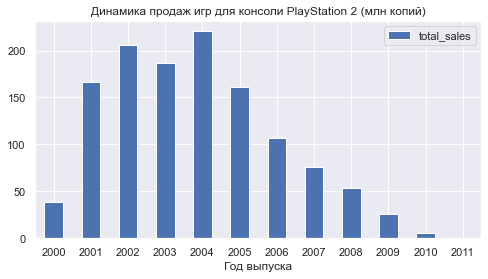

In [32]:
ps2_sales = pd.DataFrame(data[data['platform'] == 'PS2']
                         .groupby('year_of_release')['total_sales']
                         .agg('sum'), columns=['total_sales']).reset_index()
ps2_sales.plot(kind='bar', 
               x='year_of_release', 
               y='total_sales', 
               figsize=(8,4), rot=0,
               title='Динамика продаж игр для консоли PlayStation 2 (млн копий)')
plt.xlabel('Год выпуска');

Распределение продаж игр для PlayStation 2 напоминает нормальное, скошенное влево и с угасающим "хвостом" справа. Период жизни консоли составлял 11 лет - с 2000 г. по 2011 г.

В переменной `platform_sales` рассчитаем суммарные продажи всех платформ по всему миру в период 1980-2016 гг. В переменную `platform_names` запишем названия самых популярных консолей - возьмем первые 12 строк, чтобы в выборку также могла попасть платформа PC (персональный компьютер). 

In [33]:
platform_sales = pd.pivot_table(data, 
                                index=['platform', 'year_of_release'], 
                                values='total_sales', 
                                aggfunc='sum').reset_index()
platform_sales.tail()

,platform,year_of_release,total_sales
232,XB,2008,0.18
233,XOne,2013,18.96
234,XOne,2014,54.07
235,XOne,2015,60.14
236,XOne,2016,26.15


In [34]:
platform_names = data.groupby('platform')['total_sales'].agg('sum').sort_values(ascending = False).head(12).index
platform_names

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS',
       'PC', 'GB'],
      dtype='object', name='platform')

Изобразим на двух графиках распределение продаж для каждой выбранной платформы из списка топ-12.

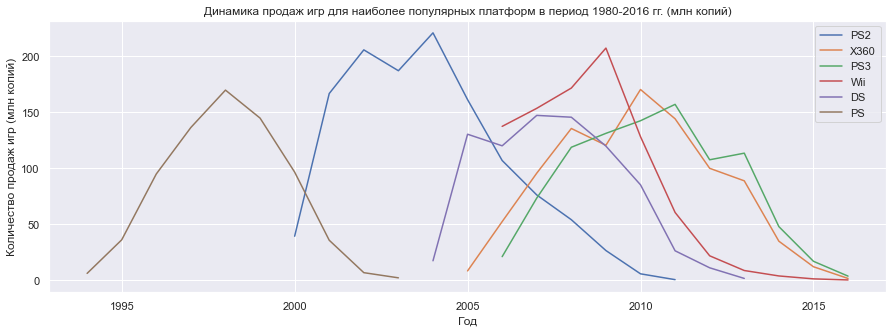

In [35]:
for name in platform_names[:6]:
    platform_data = platform_sales[platform_sales['platform'] == name]
    x = platform_data['year_of_release']
    y = platform_data['total_sales']
    sns.set(rc={'figure.figsize':(15, 5)})
    plt.plot(x, y)
    
plt.legend(platform_names[:6])
plt.title('Динамика продаж игр для наиболее популярных платформ в период 1980-2016 гг. (млн копий)')
plt.xlabel('Год')
plt.ylabel('Количество продаж игр (млн копий)')
plt.show()

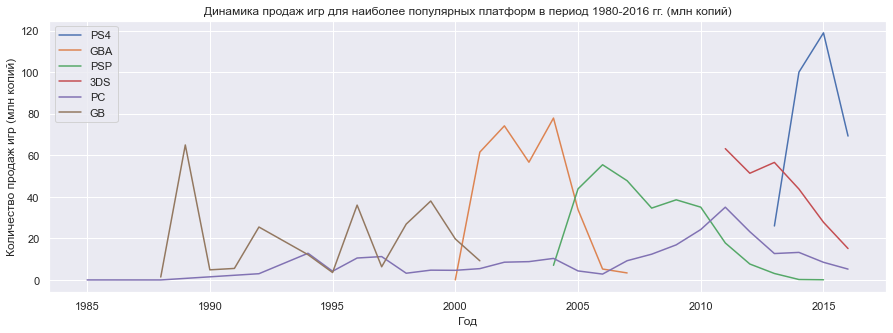

In [36]:
for name in platform_names[6:]:
    platform_data = platform_sales[platform_sales['platform'] == name]
    x = platform_data['year_of_release']
    y = platform_data['total_sales']
    sns.set(rc={'figure.figsize':(15, 5)})
    plt.plot(x, y)
    
plt.legend(platform_names[6:])
plt.title('Динамика продаж игр для наиболее популярных платформ в период 1980-2016 гг. (млн копий)')
plt.xlabel('Год')
plt.ylabel('Количество продаж игр (млн копий)')
plt.show()

Как мы видим из распределения продаж - срок жизни большинства платформ составляет около 10 лет. Начиная с 2005 года, на рынке наблюдается очень тесная конкуренция множества платформ. До 2005 года - на рынке преобладает лидерство какой-то одной платформы: PlayStation в период 1995-2000 гг. и PlayStation 2 в период 2000-2005 гг. Как правило, спад продаж любой из платформ наблюдается через 2-3 года после запуска на рынок.

Изобразим аналогичное распределение продаж только для продуктов Sony - для консолей семейства PlayStation.

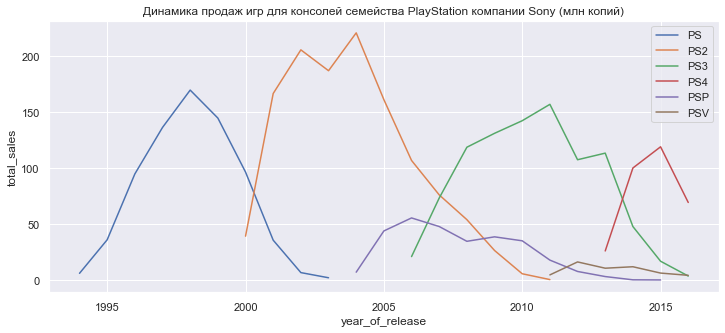

In [37]:
sony = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']

for name in sony:
    platform_data = platform_sales[platform_sales['platform'] == name]
    x = platform_data['year_of_release']
    y = platform_data['total_sales']
    sns.set(rc={'figure.figsize':(12, 5)})  
    sns.lineplot(data=platform_data, x=x, y=y)

plt.title('Динамика продаж игр для консолей семейства PlayStation компании Sony (млн копий)')
plt.legend(sony);

На основе графика можно убедиться, что срок жизни платформ компании Sony составляет около 10 лет. Наиболее долгий срок продаж имеет PlayStation Portable - около 11 лет на рынке.

Изобразим аналогичное распределение продаж игр только для продуктов Nintendo - компания имеет больше всего выпущенных платформ.

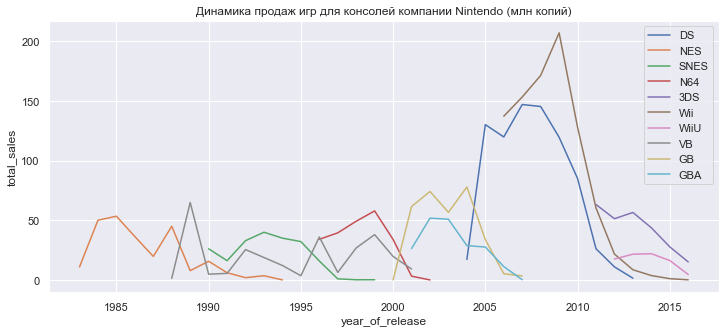

In [38]:
nintendo = ['DS', 'NES', 'SNES', 'N64', '3DS', 'Wii', 'WiiU', 'VB', 'GB', 'GBA', 'GC']

for name in nintendo:
    platform_data = platform_sales[platform_sales['platform'] == name]
    x = platform_data['year_of_release']
    y = platform_data['total_sales']
    sns.set(rc={'figure.figsize':(12, 5)})
    sns.lineplot(data=platform_data, x=x, y=y)

plt.legend(nintendo)
plt.title('Динамика продаж игр для консолей компании Nintendo (млн копий)');

Платформы Nintendo чаще всего имеет срок жизни около 5 лет. В период 2004-2011 гг. лидерами продаж были Nintendo DS и Wii. Nintendo Wii показала рекордные продажи игр среди всех продуктов компании Nintendo.

Изобразим аналогичное распределение продаж игр для компании Microsoft - она имеет наименьшее количество продуктов на рынке.

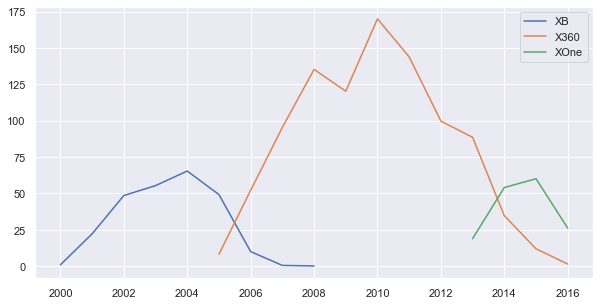

In [39]:
microsoft = ['XB', 'X360', 'XOne']

for name in microsoft:
    platform_data = platform_sales[platform_sales['platform'] == name]
    x = platform_data['year_of_release']
    y = platform_data['total_sales']
    sns.set(rc={'figure.figsize':(10, 5)})
    plt.plot(x, y)

plt.legend(microsoft)
plt.show()

На примере платформ от Microsoft, жизненный срок консолей составляет 8-11 лет. 

[Назад к содержанию](#table_of_contents)

### 3.3. Определение актуального периода <a class='anchor' id='step_3_3'></a>

Чтобы определить актуальный период для прогноза на 2017 год - необходимо понять, игры для каких современных платформ продаются больше всего. 

Предварительно обозначим, что началом актуального периода может быть 2013 год - именно в этом году на рынок вышло новое поколение консолей PlayStation 4 и Xbox One, актуальность которых затем росла все последующие годы. Убедимся нагляднее в этом предположении.

Посмотрим, для каких консолей продолжаются активные продажи игр в период с 2013 года.

In [40]:
modern_platforms = platform_sales[platform_sales['year_of_release'] >= 2013]['platform'].unique()
list(modern_platforms)

['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

Используя полученный список платформ, построим для них распределение продаж игр. Так мы узнаем, какие консоли пользуются наибольшим спросом и увидим границы актуального периода. Для наглядности построим график, начиная с 2012 года.

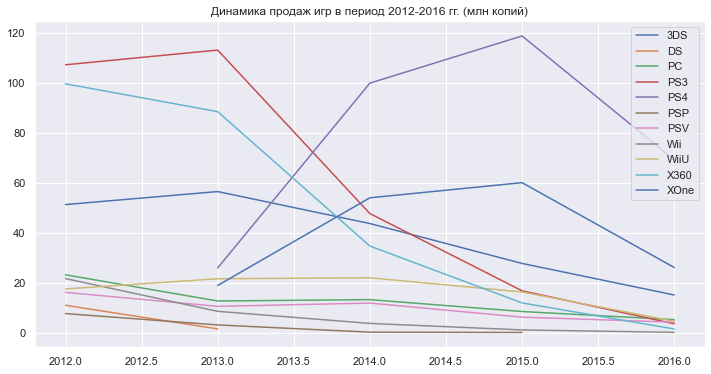

In [41]:
for name in modern_platforms:
    platform_data = platform_sales[(platform_sales['year_of_release'] >= 2012) & (platform_sales['platform'] == name)]
    x = platform_data['year_of_release']
    y = platform_data['total_sales']
    sns.set(rc={'figure.figsize':(12, 6)})
    plt.plot(x, y)

plt.legend(modern_platforms)
plt.title('Динамика продаж игр в период 2012-2016 гг. (млн копий)')
plt.show()

Как мы видим, на фоне падения продаж игр для всех устаревших консолей предыдущих поколений, на рынке наблюдается конкурентная борьба между PlayStation 4 и Xbox One, выход которых состоялся в 2013 году. Продажи для обеих платформ растут на протяжении двух лет, с 2013 г. по 2015 г., затем наблюдается их параллельный спад.

На основе полученных выводов, будем считать, что 2013-2016 гг. - является актуальным периодом для прогноза на 2017 год. Данный интервал обусловлен выходом на рынок консолей нового поколения, следовательно, это событие будет ключевым и определяющим для игровой индустрии в последующие 5-10 лет.

Запишем данные актуального периода в переменную `actual_data` и далее будем работать только с ней.

In [42]:
actual_data = data[data['year_of_release'] >= 2013]

[Назад к содержанию](#table_of_contents)

### 3.4. Определение потенциально прибыльных платформ <a class='anchor' id='step_3_4'></a>

Определим, какие платформы лидируют по продажам, какие демонстрируют рост и падение. Выберим несколько потенциально прибыльных платформ.

Посмотрим, какие платформы лидируют по глобальным продажам игр в период 2013-2016 гг.

In [43]:
most_profit = actual_data.groupby('platform')['total_sales'].agg('sum')
most_profit.sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.78
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

Наибольшие суммарные продажи игр принадлежат платформе PlayStation 4 - с момента своего выхода в 2013 г. консоль успела обогнать всех конкурентов и выйти в лидеры. 

Чтобы узнать динамику продаж всех платформ в актуальном периоде, построим сводную таблицу `top_sales`, в которой отразим объемы глобальных продаж по каждому году и суммарно. Отсортируем платформы по суммарным продажам в 2016 году по убыванию.

In [44]:
top_sales = pd.pivot_table(data=actual_data,
                           index='platform',
                           values='total_sales',
                           columns='year_of_release',
                           aggfunc='sum')
top_sales['total'] = actual_data.groupby('platform')['total_sales'].agg('sum')

top_sales.columns = ['2013', '2014', '2015', '2016', 'total']
top_sales = top_sales.sort_values(by='2016', ascending=False).reset_index()
top_sales

,platform,2013,2014,2015,2016,total
0,PS4,25.99,100.00,118.90,69.25,314.14
1,XOne,18.96,54.07,60.14,26.15,159.32
2,3DS,56.57,43.76,27.78,15.14,143.25
3,PC,12.73,13.28,8.52,5.25,39.78
4,WiiU,21.65,22.03,16.35,4.60,64.63
5,PSV,10.59,11.90,6.25,4.25,32.99
6,PS3,113.25,47.76,16.82,3.60,181.43
7,X360,88.58,34.74,11.96,1.52,136.80
8,Wii,8.59,3.75,1.14,0.18,13.66
9,DS,1.54,NaN,NaN,NaN,1.54


Как видно из таблицы, рост показывали только две платформы - PlayStation 4 и Xbox One (по итогам 2016 г. рост уже прерывался и начинался спад). Все остальные демонстрировали падения продаж игр на протяжении актуального периода (2013-2016 гг.).

Для двух последних платформ - PlayStation Portable (PSP) и Nintendo DS - продажи игр прекратились в 2015 и 2013 годах соответственно, чем обусловлено наличие пропусков в строках с их данными.

Чтобы определить круг наиболее прибыльных платформ, возьмем первые 4 платформы - именно они показали наибольшую прибыльность, несмотря на общий спад продаж на конец периода.

In [45]:
profitable_platforms = list(top_sales['platform'])[:4]
profitable_platforms

['PS4', 'XOne', '3DS', 'PC']

Таким образом, число потенциально прибыльных платформ включает:
- PlayStation 4;
- Xbox One;
- Nintendo 3DS;
- PC.

Платформа персональных компьютеров показывает малые продажи игр по сравнению с консолями, однако их объем почти всегда стабилен - падение продаж игр не так критично. Также, на компьютеры в малой степени влияет сменяемость поколений, пользователи могут самостоятельно модернизировать их в отличие от консолей. В связи с этим платформу PC всегда следует рассматривать как потенциально прибыльную.

Посмотрим на данные тенденции более наглядно, построив график.

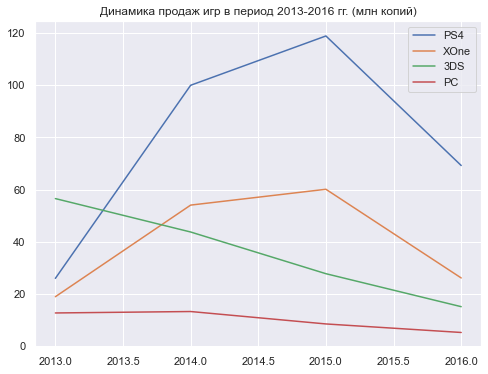

In [46]:
for name in profitable_platforms:
    platform_data = platform_sales[(platform_sales['year_of_release'] >= 2013) & (platform_sales['platform'] == name)]
    x = platform_data['year_of_release']
    y = platform_data['total_sales']
    sns.set(rc={'figure.figsize':(8, 6)})
    plt.plot(x, y)

plt.legend(profitable_platforms)
plt.title('Динамика продаж игр в период 2013-2016 гг. (млн копий)')
plt.show()

Платформы Nintendo 3DS и PC - демонстрировали падение на протяжении всего актуального периода (2013-2016 гг.). Платформы PlayStation 4 и Xbox One показывали существенный рост в первые два года своих продаж (2013-2015 гг.), после чего наблюдался их спад.

[Назад к содержанию](#table_of_contents)

### 3.5. Диаграмма размаха глобальных продаж игр в разбивке по платформам <a class='anchor' id='step_3_5'></a>

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Как мы выяснили ранее, актуальными платформами являются:
- PlayStation 4;
- PlayStation 3;
- PlayStation Vita;
- PlayStation Portable;
- Xbox 360;
- Xbox One;
- Nintendo 3DS;
- Nintendo DS;
- Nintendo Wii
- Nintendo WiiU;
- PC.

Построим для них диаграмму размаха суммарных продаж (boxplot) и вычислим вспомогательные описательные статистики.

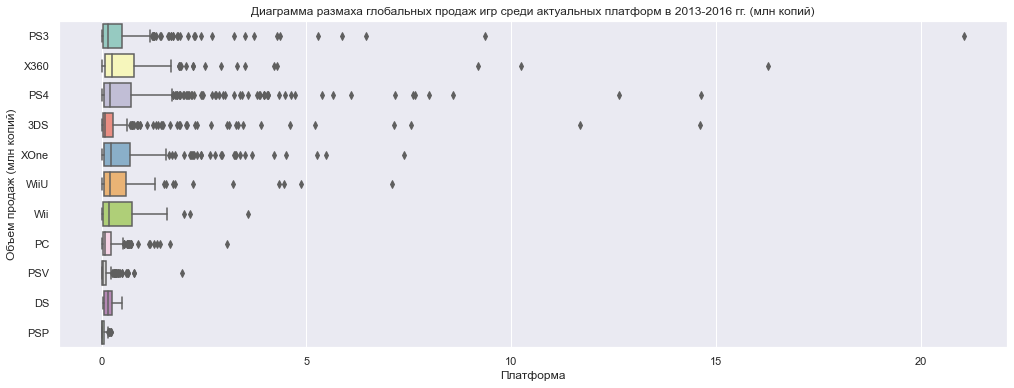

In [47]:
sns.set(rc={'figure.figsize':(17, 6)})
sns.boxplot(x='total_sales', y='platform', data=actual_data,  palette="Set3", orient='h')
plt.title('Диаграмма размаха глобальных продаж игр среди актуальных платформ в 2013-2016 гг. (млн копий)')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж (млн копий)');

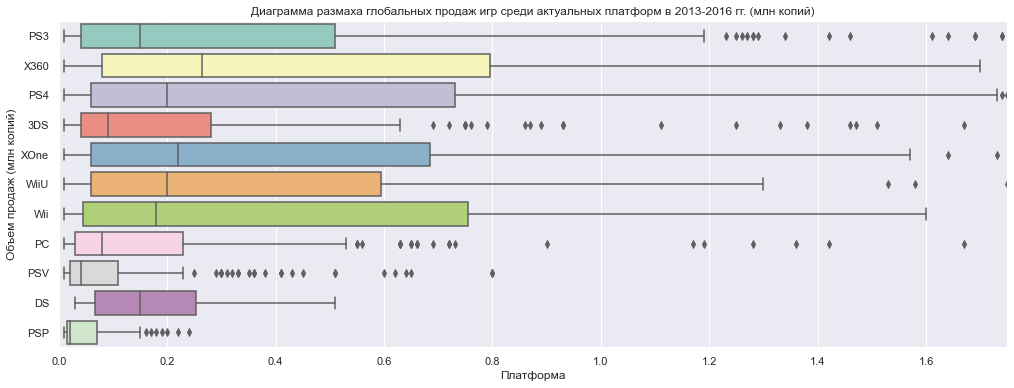

In [48]:
sns.set(rc={'figure.figsize':(17, 6)})
sns.boxplot(x='total_sales', y='platform', data=actual_data,  palette="Set3", orient='h')
plt.title('Диаграмма размаха глобальных продаж игр среди актуальных платформ в 2013-2016 гг. (млн копий)');
plt.xlim(0, 1.75)
plt.xlabel('Платформа')
plt.ylabel('Объем продаж (млн копий)');

In [49]:
actual_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,190.0,0.209368,0.351521,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


Как видно из диаграммы, PlayStation 4 и Xbox One имеют очень схожие параметры своей выборки. Их медианное значение продаж находится на одном уровне, в районе 200-220 тыс. копий игр - это примерный тираж, которым чаще всего раскупаются игры на этих платформах. Среднее вариьируется в диапазоне 645-801 тыс. копий игр - продажи одной игры в среднем.

Платформы PC и Nintendo 3DS имеют также достаточно схожие параметры своих выборок. Их медианное значение находится на одном уровне, продажи новой игры составляют в районе 80-90 тыс. копий игр, в среднем 209-473 тыс. копий игр.

На графике заметно множество "выбросов", доходящих в значении до 14 млн копий. В данном случае, так выглядят сверхуспешные игры, продажи которых по всему миру составили максимальные и рекордные значения в период с 2013 года. Взглянем на эти знаменитые игры.

In [50]:
actual_data.sort_values(by='total_sales', ascending=False)\
.head(5)[['name', 'platform', 'year_of_release', 'total_sales']]

,name,platform,year_of_release,total_sales
16,Grand Theft Auto V,PS3,2013,21.05
23,Grand Theft Auto V,X360,2013,16.27
31,Call of Duty: Black Ops 3,PS4,2015,14.63
33,Pokemon X/Pokemon Y,3DS,2013,14.60
42,Grand Theft Auto V,PS4,2014,12.62


[Назад к содержанию](#table_of_contents)

### 3.6. Анализ зависимости между отзывами и продажами <a class='anchor' id='step_3_6'></a>

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Как показывает анализ, самой популярной платформой в актуальном периоде является Sony PlayStation 4 - построим диаграмму рассеяния и рассчитаем коэффициент корреляции между отзывами и продажами для нее.

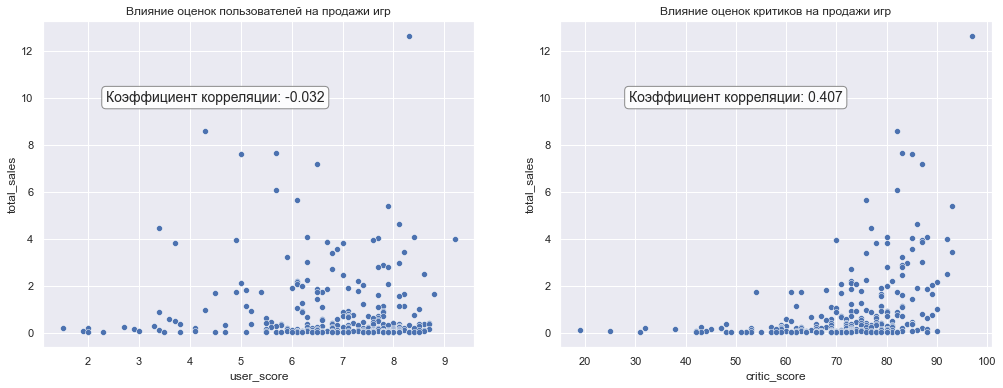

In [51]:
ps4_data = actual_data[actual_data['platform'] == 'PS4']

fig, axs = plt.subplots(ncols=2)
sns.set(rc={'figure.figsize':(17, 6)})
sns.scatterplot(x=ps4_data['user_score'], 
                y=ps4_data['total_sales'],
                ax=axs[0])
sns.scatterplot(x=ps4_data['critic_score'], 
                y=ps4_data['total_sales'],
                ax=axs[1])

axs[0].set_title('Влияние оценок пользователей на продажи игр')
axs[1].set_title('Влияние оценок критиков на продажи игр')
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
axs[0].text(4.5, 10, "Коэффициент корреляции: -0.032", ha="center", va="center", size=14,
        bbox=bbox_props)
axs[1].text(50, 10, "Коэффициент корреляции: 0.407", ha="center", va="center", size=14,
        bbox=bbox_props);

In [52]:
print('Влияние оценок пользователей на продажи:', round(ps4_data['total_sales'].corr(ps4_data['user_score']), 3))
print('Влияние оценок критиков на продажи:', round(ps4_data['total_sales'].corr(ps4_data['critic_score']), 3))

Влияние оценок пользователей на продажи: -0.032
Влияние оценок критиков на продажи: 0.407


Как мы видим, более четкая взаимосвязь прослеживается на графике с оценками критиков (`critic_score`) - оценки критиков в умеренной степени влияют на продажи игр в отличие от оценок пользователей. Это подтверждается и значением коэффициента корреляции - 0.407, что говорит о наличии умеренной, несильной связи. Чем выше оценка, тем выше объем продаж для игры.

В случае с оценками пользователей, нельзя утверждать, что их оценки влияют на объем продаж игр - взаимосвязи нет, коэффициент корреляции лишь -0.032.

[Назад к содержанию](#table_of_contents)

### 3.7. Анализ зависимости между отзывами и продажами других платформ <a class='anchor' id='step_3_7'></a>

Соотнесем полученные выводы с продажами игр на других платформах.

Рассмотрим, как оценки критиков и пользователей влияют на продажи всех других платформ, которые были на рынке с 2013 года.

In [53]:
result = []
actual_platforms = actual_data['platform'].unique()
for name in actual_platforms:
    df = actual_data[actual_data['platform'] == name]
    a = df['critic_score'].corr(df['total_sales'])
    b = df['user_score'].corr(df['total_sales'])
    result.append((name, a, b))
corr_result = pd.DataFrame(result)
corr_result.columns = ['platform', 'critic_score', 'user_score']
corr_result.sort_values(by='critic_score', ascending=False).head(8)

c:\python 3.9.4\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\python 3.9.4\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,platform,critic_score,user_score
4,XOne,0.416998,-0.068925
2,PS4,0.406568,-0.031957
5,WiiU,0.376415,0.419330
3,3DS,0.357057,0.241504
1,X360,0.350345,-0.011742
0,PS3,0.334285,0.002394
8,PSV,0.254742,0.000942
7,PC,0.197390,-0.090552


Как мы видим, на всех остальных платформах наблюдается схожая картина - коэффициенты корреляции продаж и оценок критиков варьируются в диапазоне 0.3-0.4, что свидетельствует об умеренной, недостаточно сильной связи.

[Назад к содержанию](#table_of_contents)

### 3.8. Анализ прибыльности жанров <a class='anchor' id='step_3_8'></a>

Посмотрим на общее распределение игр по жанрам в течение актуального периода (2013-2016 гг.)

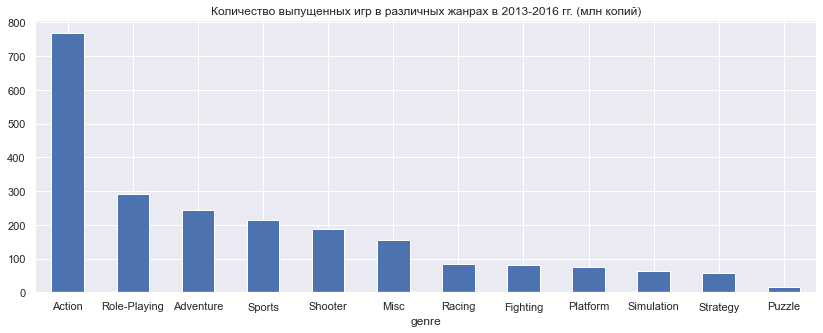

In [54]:
actual_data\
.groupby('genre')['genre']\
.agg('count')\
.sort_values(ascending=False).plot(kind='bar',
                                   figsize=(14,5),
                                   rot=0)
plt.title('Количество выпущенных игр в различных жанрах в 2013-2016 гг. (млн копий)');

Подавляющее количество игр было выпущено в жанре "Action". Меньше всего - в жанре "Puzzle".

Создадим сводную таблицу `genre_count` для цифрового отображения данной динамики в разбивке по годам. Отсортируем датафрейм по значениям 2016 года по убыванию.

In [55]:
genre_count = pd.pivot_table(actual_data, 
                                 index='genre', 
                                 columns='year_of_release', 
                                 values='name', 
                                 aggfunc='count')

genre_count.columns = ['2013', '2014', '2015', '2016']
genre_count.sort_values(by='2016', ascending=False)

,2013,2014,2015,2016
genre,,,,
Action,148,188,253,178
Adventure,60,75,54,56
Role-Playing,71,89,78,54
Sports,53,54,59,48
Shooter,59,47,34,47
Misc,42,42,39,32
Racing,16,27,18,24
Simulation,18,11,15,18
Fighting,20,23,21,16


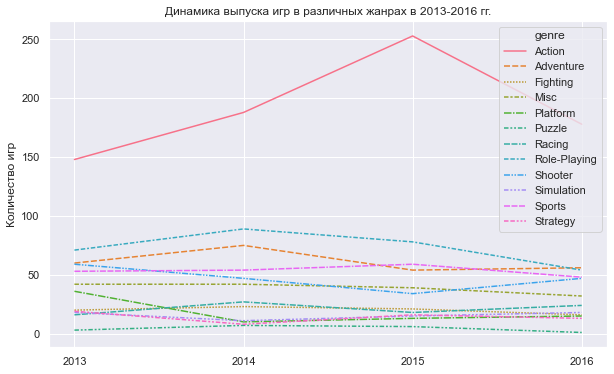

In [56]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.lineplot(data=genre_count.transpose())
plt.ylabel('Количество игр')
plt.title('Динамика выпуска игр в различных жанрах в 2013-2016 гг.');

Годовое количество игр в жанре "Action" росло 2 года подряд - с 148 игр в 2013 г. до 253 в 2015 г. Далее последовал спад до 178 игр в год. Такие жанры, как "Adventure", "Role-Playing", "Sports", "Shooter" показывали похожую между собой динамику в распределении количества, оставаясь на уровне 50-70 игр в год.

Чтобы увидеть распределение продаж наиболее популярных жанров игр в актуальном периоде, построим сводную таблицу `genre_sales`, в которой отразим объемы глобальных продаж по каждому году. Отсортируем жанры по суммарным продажам в 2016 году по убыванию.

In [57]:
genre_sales = pd.pivot_table(actual_data, 
                             index='genre', 
                             columns='year_of_release', 
                             values='total_sales', 
                             aggfunc='sum')

genre_sales.columns = ['2013', '2014', '2015', '2016']
genre_sales.sort_values(by='2013', ascending=False)

,2013,2014,2015,2016
genre,,,,
Action,122.86,97.23,72.02,30.11
Shooter,62.04,65.21,67.51,38.22
Role-Playing,44.45,45.62,37.64,18.18
Sports,41.17,45.15,40.84,23.49
Misc,25.27,23.38,11.57,2.60
Platform,24.54,8.81,6.05,3.23
Racing,12.37,16.66,8.07,2.79
Simulation,8.63,5.58,5.66,1.89
Fighting,7.09,15.85,7.90,4.47


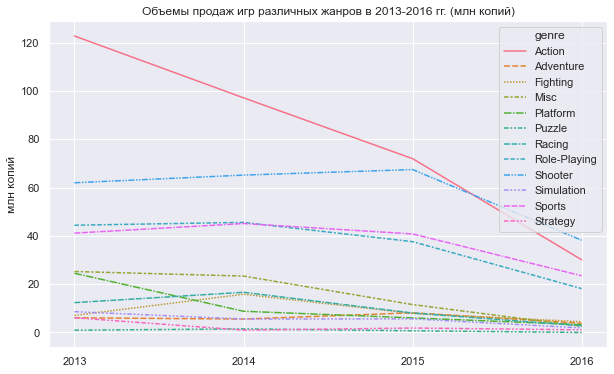

In [58]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.lineplot(data=genre_sales.transpose())
plt.ylabel('млн копий')
plt.title('Объемы продаж игр различных жанров в 2013-2016 гг. (млн копий)');

Как видно из графика, продажи в жанре "Action" показали самое стремительное падение в актуальном периоде - с 122 млн копий игр в 2013 году до 30 млн копий в 2016 году (падение объемов продаж в 4 раза). В плане популярности на равне с жанром "Action" заметны такие жанры, как "Shooter", "Role-Playing", "Sports" - их можно охарактеризовать, как достаточно прибыльные.

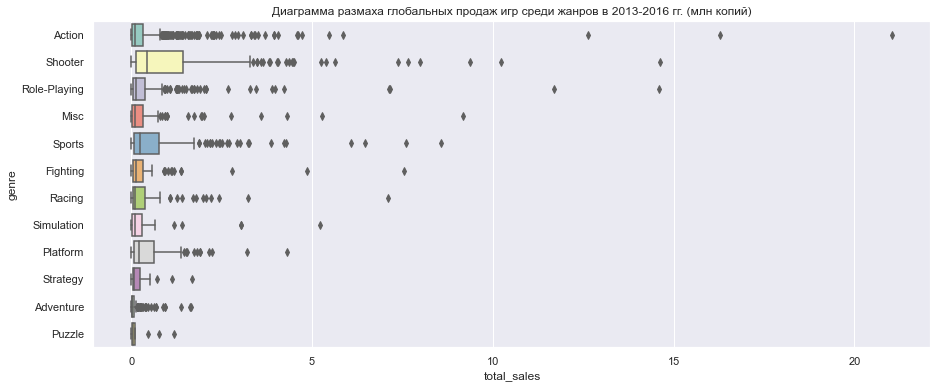

In [59]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.boxplot(x='total_sales', 
            y='genre', 
            data=actual_data,
            palette="Set3", 
            orient='h'
           )
plt.title('Диаграмма размаха глобальных продаж игр среди жанров в 2013-2016 гг. (млн копий)');

На диаграмме размаха, включающей выбросы, мы видим наибольшие медианные продажи у жанров Shooter, Sports, Platform. Взглянем на медианы более детально.

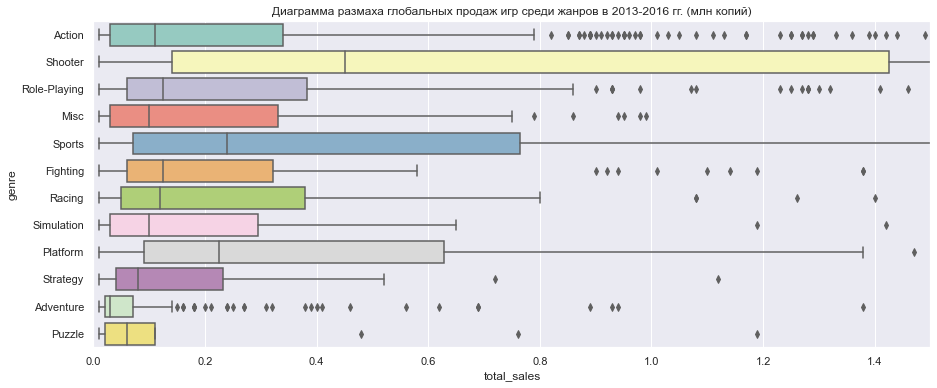

In [60]:
sns.boxplot(x='total_sales', 
            y='genre', 
            data=actual_data,
            palette="Set3", 
            orient='h'
           )
plt.title('Диаграмма размаха глобальных продаж игр среди жанров в 2013-2016 гг. (млн копий)')
plt.xlim(0, 1.5);

In [61]:
actual_data.groupby('genre')['total_sales'].agg(['median']).sort_values(by='median', ascending=False)

,median
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


Мы видим, что по медианным значениям (медианное количество проданных копий одной игры) наибольшую прибыльность показывают жанры Shooter, Sports, Platform. Наиболее чаще одна игра жанра Shooter распродается в количестве 450 тыс. копий.

Наименьшую прибыльность показывают жанры Strategy, Puzzle, Adventure. Продажи одной игры не превышают для этих жанров 30-80 тыс. копий.

[Назад к содержанию](#table_of_contents)

## Шаг 4. Портреты регионов <a class='anchor' id='step_4'></a>

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5) и опишем различия в долях продаж.
- Самые популярные жанры (топ-5).
- Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

### 4.1. Самые популярные платформы (топ-5) <a class='anchor' id='step_4_1'></a>

Рассмотрим топ-5 самых популярных платформ в Северной Америке в актуальном периоде. Отсортируем данные по объему продаж в регионе и присвоим числовой ранг от 1 до 5 каждой позиции списка.

In [62]:
na_top_platforms = pd.DataFrame(actual_data\
                                .groupby('platform')['na_sales']
                                .agg('sum').sort_values(ascending=False)).reset_index().head()
na_top_platforms['na_rank'] = pd.Series(range(1, len(na_top_platforms) + 1))
na_top_platforms

,platform,na_sales,na_rank
0,PS4,108.74,1
1,XOne,93.12,2
2,X360,81.66,3
3,PS3,63.50,4
4,3DS,38.20,5


Создадим словарь с полученным топ-5, в котором ключом будет являться название платформы, а значением - номер позиции в топ-5 исследуемого региона.

In [63]:
na_ranks = na_top_platforms.set_index('platform')['na_rank'].to_dict()
na_ranks

{'PS4': 1, 'XOne': 2, 'X360': 3, 'PS3': 4, '3DS': 5}

Добавим в начальный датафрейм `data` столбец `na_sales_top_rank`, где для каждой платформы будет обозначен ее ранг в топ-5 для Северной Америки. Платформы не входящие в топ-5 будут промаркированы как `other`. Данная обработка поможет вычислить доли продаж в регионе.

In [64]:
actual_data['na_sales_top_rank'] = actual_data['platform'].apply(lambda x: na_ranks[x] if x in na_ranks else 'other')

Рассчитаем сумму всех продаж в Северной Америке для тех платформ, которые не входят в список топ-5.

In [65]:
na_other_sum = actual_data.query('na_sales_top_rank == "other"')['na_sales'].sum()

Добавим строку с дополнительными данными в датафрейм `na_top_platforms`, в которой отразим суммы и доли продаж всех платформ в разбивке на топ-5 и другие.

In [66]:
row = pd.Series({'platform': 'other', 
                 'na_sales': na_other_sum, 
                 'na_rank': 'other'})
na_top_platforms = na_top_platforms.head().append(row, ignore_index=True)
na_top_platforms['na_%'] = round(na_top_platforms['na_sales'] / na_top_platforms['na_sales'].sum() * 100, 2)
na_top_platforms

,platform,na_sales,na_rank,na_%
0,PS4,108.74,1,24.84
1,XOne,93.12,2,21.27
2,X360,81.66,3,18.65
3,PS3,63.50,4,14.51
4,3DS,38.20,5,8.73
5,other,52.55,other,12.00


Изобразим на диаграмме полученные данные о топ-5 Северной Америки.

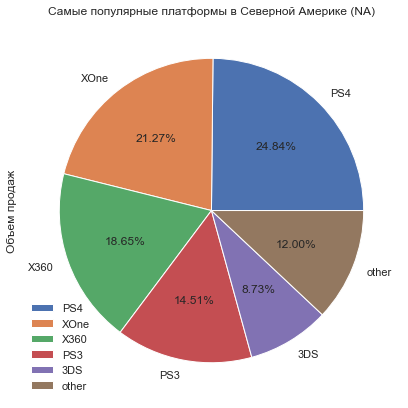

In [67]:
plt.style.use('seaborn-whitegrid')
na_top_platforms.plot(kind='pie', 
                      labels=na_top_platforms['platform'], 
                      y='na_sales',
                      autopct='%.2f%%',
                      figsize=(9,7))
plt.legend(loc=3, prop={'size': 11})
plt.ylabel('Объем продаж')
plt.title('Самые популярные платформы в Северной Америке (NA)');

Самыми популярными платформами в Северной Америке являются:
1. PlayStation 4;
2. Xbox One;
3. Xbox 360;
4. PlayStation 3;
5. Nintendo 3DS.

Проделаем аналогичные действия, чтобы сформировать список топ-5 самых популярных платформ в Европе.

In [68]:
# отфильтруем топ-5 платформ и проранжируем их
eu_top_platforms = pd.DataFrame(actual_data.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False)).reset_index().head()
eu_top_platforms['eu_rank'] = pd.Series(range(1, len(eu_top_platforms) + 1))

# создадим словарь с рангами платформ
eu_ranks = eu_top_platforms.set_index('platform')['eu_rank'].to_dict()
# {'PS4': 1, 'PS3': 2, 'XOne': 3, 'X360': 4, '3DS': 5}

# добавим столбец с маркировкой платформы в соответствии с рангом
actual_data['eu_sales_top_rank'] = actual_data['platform'].apply(lambda x: eu_ranks[x] if x in eu_ranks else 'other')

# рассчитаем сумму продаж платформ, не входящих в топ-5
eu_other_sum = actual_data.query('eu_sales_top_rank == "other"')['eu_sales'].sum()

# дополняем сводную таблицу долями продаж
row = pd.Series({'platform': 'other', 
                 'eu_sales': eu_other_sum, 
                 'eu_rank': 'other'})
eu_top_platforms = eu_top_platforms.head().append(row, ignore_index=True)
eu_top_platforms['eu_%'] = round(eu_top_platforms['eu_sales'] / eu_top_platforms['eu_sales'].sum() * 100, 2)
eu_top_platforms

,platform,eu_sales,eu_rank,eu_%
0,PS4,141.09,1,35.95
1,PS3,67.81,2,17.28
2,XOne,51.59,3,13.14
3,X360,42.52,4,10.83
4,3DS,30.96,5,7.89
5,other,58.51,other,14.91


Изобразим на диаграмме полученные данные о топ-5 Европы.

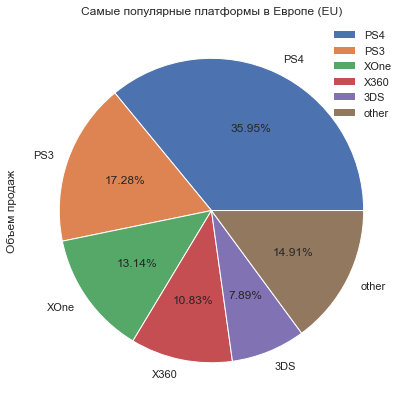

In [69]:
plt.style.use('seaborn-whitegrid')
eu_top_platforms.plot(kind='pie', 
                      labels=eu_top_platforms['platform'], 
                      y='eu_sales',
                      autopct='%.2f%%',
                      figsize=(9,7))
plt.legend(loc=1, prop={'size': 11})
plt.ylabel('Объем продаж')
plt.title('Самые популярные платформы в Европе (EU)');

Самыми популярными платформами в Европе являются:

1. PlayStation 4
2. PlayStation 3
3. Xbox One
4. Xbox 360
5. Nintendo 3DS.

Как мы видим, в топ-5 самых популярных платформ в Северной Америке и Европе входят одни и те же консоли, только лишь различаясь номером своей позиции в списке. Сравним списки топ-5 для Северной Америки и Европы.

In [70]:
na_eu_top = eu_top_platforms.merge(na_top_platforms, on='platform')
na_eu_top

,platform,eu_sales,eu_rank,eu_%,na_sales,na_rank,na_%
0,PS4,141.09,1,35.95,108.74,1,24.84
1,PS3,67.81,2,17.28,63.50,4,14.51
2,XOne,51.59,3,13.14,93.12,2,21.27
3,X360,42.52,4,10.83,81.66,3,18.65
4,3DS,30.96,5,7.89,38.20,5,8.73
5,other,58.51,other,14.91,52.55,other,12.00


В обоих регионах лидерство удерживает PlayStation 4. Различие заключается лишь в большей популярности консолей Xbox в США, чем в Европе. Платформа PlayStation более популярна у европейцев.

Сравним продажи самых популярных платформ Северной Америки и Европы на графике.

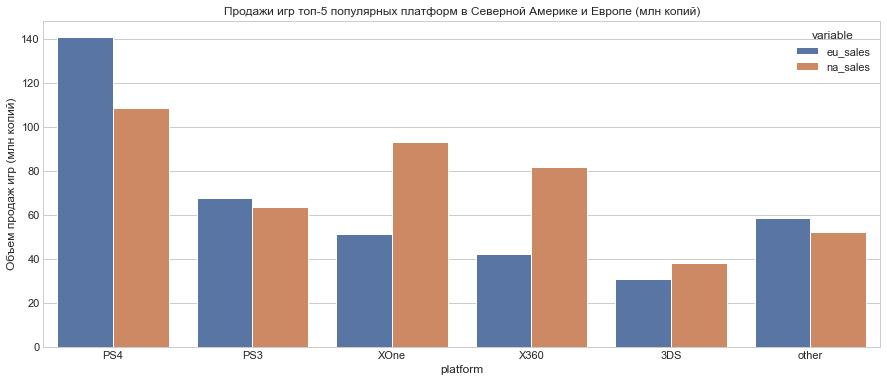

In [71]:
na_eu_top_melted = na_eu_top.melt(id_vars='platform', value_vars=['eu_sales', 'na_sales'])

sns.barplot(data=na_eu_top_melted, x='platform', y='value', hue='variable')
plt.title('Продажи игр топ-5 популярных платформ в Северной Америке и Европе (млн копий)')
plt.ylabel('Объем продаж игр (млн копий)');

Как видно из графика, консоли семейства PlayStation продаются более успешно в Европе, в то время, как консоли Xbox продаются успешнее в Северной Америке.

Сформируем список топ-5 самых популярных платформ в Японии и рассчитаем доли их продаж.

In [72]:
# отфильтруем топ-5 платформ и проранжируем их
jp_top_platforms = pd.DataFrame(actual_data.groupby('platform')['jp_sales'].agg('sum')
                                .sort_values(ascending=False)).reset_index().head()
jp_top_platforms['jp_rank'] = pd.Series(range(1, len(jp_top_platforms) + 1))

# создадим словарь с рангами платформ
jp_ranks = jp_top_platforms.set_index('platform')['jp_rank'].to_dict()
# {'3DS': 1, 'PS3': 2, 'PSV': 3, 'PS4': 4, 'WiiU': 5}

# добавим столбец с маркировкой платформы в соответствии с рангом
actual_data['jp_sales_top_rank'] = actual_data['platform'].apply(lambda x: jp_ranks[x] if x in jp_ranks else 'other')

# рассчитаем сумму продаж платформ, не входящих в топ-5
jp_other_sum = actual_data.query('jp_sales_top_rank == "other"')['jp_sales'].sum()

# дополняем сводную таблицу долями продаж
row = pd.Series({'platform': 'other', 
                 'jp_sales': jp_other_sum, 
                 'jp_rank': 'other'})
jp_top_platforms = jp_top_platforms.head().append(row, ignore_index=True)
jp_top_platforms['%'] = round(jp_top_platforms['jp_sales'] / jp_top_platforms['jp_sales'].sum() * 100, 2)
jp_top_platforms

,platform,jp_sales,jp_rank,%
0,3DS,67.81,1,48.17
1,PS3,23.35,2,16.59
2,PSV,18.59,3,13.21
3,PS4,15.96,4,11.34
4,WiiU,10.88,5,7.73
5,other,4.19,other,2.98


Изобразим сводные данные на круговой диаграмме.

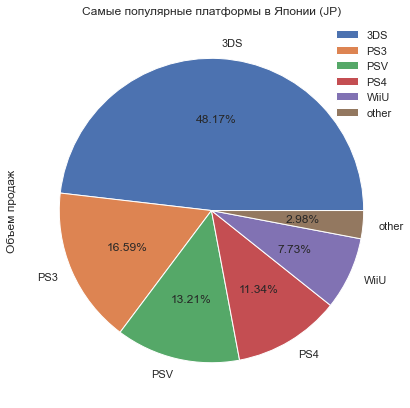

In [73]:
plt.style.use('seaborn-whitegrid')
jp_top_platforms.plot(kind='pie', 
                      labels=jp_top_platforms['platform'], 
                      y='jp_sales',
                      autopct='%.2f%%',
                      figsize=(9,7))
plt.legend(loc=1, prop={'size': 11})
plt.ylabel('Объем продаж')
plt.title('Самые популярные платформы в Японии (JP)');

Самыми популярными платформами в Японии являются:

1. Nintendo 3DS
2. PlayStation 3
3. PlayStation Vita
4. PlayStation 4
5. Nintendo WiiU.

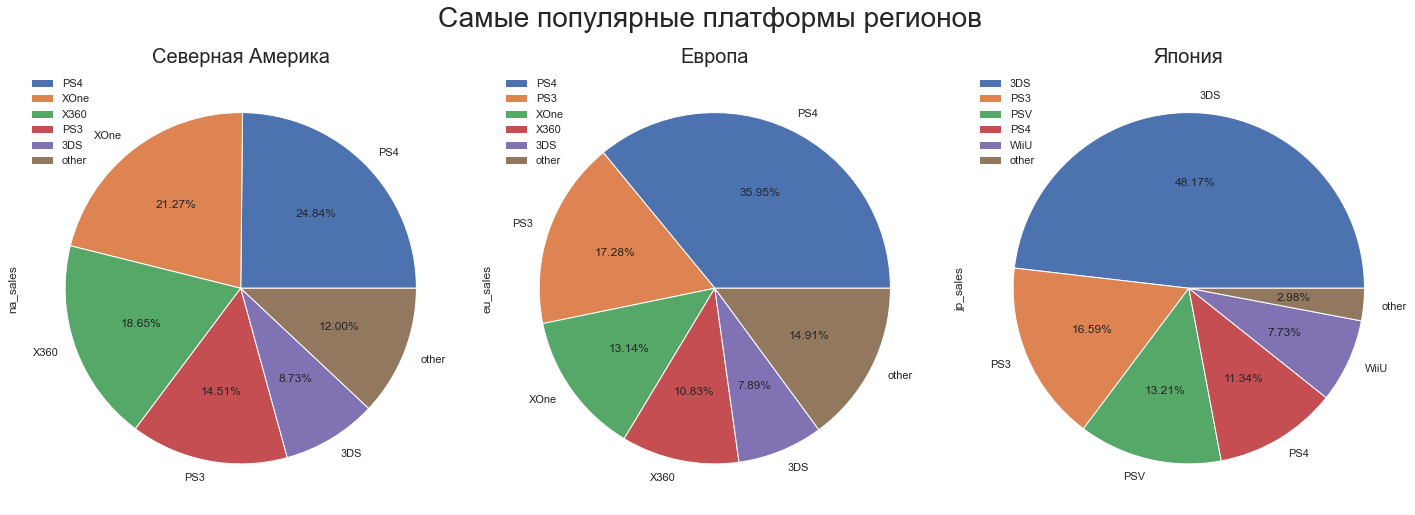

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

na_top_platforms.plot(kind='pie', 
                      labels=na_top_platforms['platform'], 
                      y='na_sales',
                      autopct='%.2f%%',
                      ax=axes[0])
eu_top_platforms.plot(kind='pie', 
                      labels=eu_top_platforms['platform'], 
                      y='eu_sales',
                      autopct='%.2f%%',
                      ax=axes[1])
jp_top_platforms.plot(kind='pie', 
                      labels=jp_top_platforms['platform'], 
                      y='jp_sales',
                      autopct='%.2f%%',
                      ax=axes[2])

fig.suptitle("Самые популярные платформы регионов", fontsize=28, verticalalignment='baseline')
axes[0].set_title('Северная Америка', fontsize=20)
axes[1].set_title('Европа', fontsize=20)
axes[2].set_title('Япония', fontsize=20)
axes[0].legend(loc=2)
axes[1].legend(loc=2)
axes[2].legend(loc=2)
plt.tight_layout()
plt.show()


[Назад к содержанию](#table_of_contents)

### 4.2. Самые популярные жанры (топ-5) <a class='anchor' id='step_4_2'></a>

Рассмотрим топ-5 самых популярных жанров в Северной Америке в актуальном периоде. Отсортируем данные по объему продаж в регионе и присвоим числовой ранг от 1 до 5 каждой позиции списка.

In [75]:
na_top_genres = pd.DataFrame(actual_data.groupby('genre')['na_sales']
                             .agg('sum')
                             .sort_values(ascending=False)).reset_index().head()
na_top_genres['na_rank'] = pd.Series(range(1, len(na_top_genres) + 1))
na_top_genres

,genre,na_sales,na_rank
0,Action,126.11,1
1,Shooter,109.74,2
2,Sports,65.27,3
3,Role-Playing,46.40,4
4,Misc,27.49,5


Создадим словарь с полученным топ-5, в котором ключом будет являться название жанра, а значением - номер позиции в топ-5 исследуемого региона.

In [76]:
na_genre_ranks = na_top_genres.set_index('genre')['na_rank'].to_dict()
na_genre_ranks

{'Action': 1, 'Shooter': 2, 'Sports': 3, 'Role-Playing': 4, 'Misc': 5}

Добавим в начальный датафрейм `data` столбец `na_genre_top_rank`, где для каждого жанра будет обозначен его ранг в топ-5 для Северной Америки. Жанры не входящие в топ-5 будут промаркированы как `other`. Данная обработка поможет вычислить доли продаж в разбивке жанров в регионе.

In [77]:
actual_data['na_genre_top_rank'] = actual_data['genre'].apply(lambda x: na_genre_ranks[x] if x in na_genre_ranks else 'other')

Рассчитаем сумму и доли всех продаж в Северной Америке для тех жанров, которые не входят в список топ-5. 

In [78]:
na_other_genre_sum = actual_data.query('na_genre_top_rank == "other"')['na_sales'].sum()

row = pd.Series({'genre': 'other', 
                'na_sales': na_other_genre_sum, 
                 'na_rank': 'other'})

na_top_genres = na_top_genres.head().append(row, ignore_index=True)
na_top_genres['%'] = round(na_top_genres['na_sales'] / na_top_genres['na_sales'].sum() * 100, 2)
na_top_genres

,genre,na_sales,na_rank,%
0,Action,126.11,1,28.81
1,Shooter,109.74,2,25.07
2,Sports,65.27,3,14.91
3,Role-Playing,46.40,4,10.60
4,Misc,27.49,5,6.28
5,other,62.76,other,14.34


Изобразим полученные данные топ-5 на круговой диаграмме.

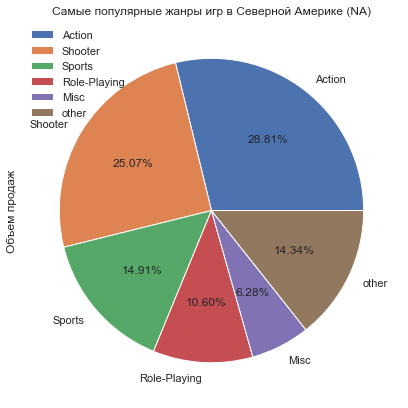

In [79]:
plt.style.use('seaborn-whitegrid')
na_top_genres.plot(kind='pie', 
                   labels=na_top_genres['genre'], 
                   y='na_sales',
                   autopct='%.2f%%',
                   figsize=(9,7))
plt.legend(loc=2, prop={'size': 11})
plt.ylabel('Объем продаж')
plt.title('Самые популярные жанры игр в Северной Америке (NA)');

Самыми популярными жанрами в Северной Америке являются:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Выполним аналогичный анализ для жанров игр в Европе.

In [80]:
# отфильтруем топ-5 жанров и проранжируем их
eu_top_genres = pd.DataFrame(actual_data.groupby('genre')['eu_sales']
                             .agg('sum')
                             .sort_values(ascending=False)).reset_index().head()
eu_top_genres['eu_rank'] = pd.Series(range(1, len(eu_top_genres) + 1))

# создадим словарь с рангами жанров
eu_genre_ranks = eu_top_genres.set_index('genre')['eu_rank'].to_dict()

# добавим столбец с маркировкой жанра в соответствии с рангом
actual_data['eu_genre_top_rank'] = actual_data['genre'].apply(lambda x: eu_genre_ranks[x] if x in eu_genre_ranks else 'other')

# рассчитаем сумму продаж жанров, не входящих в топ-5
eu_other_genre_sum = actual_data.query('eu_genre_top_rank == "other"')['eu_sales'].sum()

# дополним сводную таблицу долями продаж
row = pd.Series({'genre': 'other', 
                 'eu_sales': eu_other_genre_sum, 
                 'eu_rank': 'other'})
eu_top_genres = eu_top_genres.head().append(row, ignore_index=True)
eu_top_genres['%'] = round(eu_top_genres['eu_sales'] / eu_top_genres['eu_sales'].sum() * 100, 2)
eu_top_genres

,genre,eu_sales,eu_rank,%
0,Action,118.38,1,30.16
1,Shooter,87.86,2,22.39
2,Sports,60.52,3,15.42
3,Role-Playing,36.97,4,9.42
4,Racing,20.19,5,5.14
5,other,68.56,other,17.47


Изобразим полученный топ-5 на круговой диаграмме.

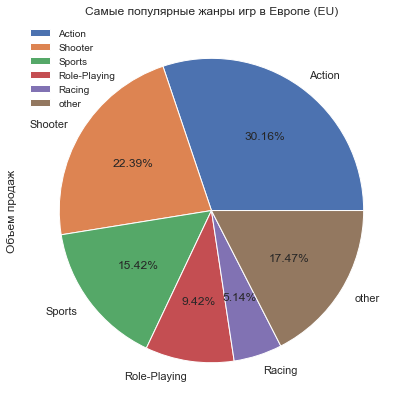

In [81]:
plt.style.use('seaborn-whitegrid')
eu_top_genres.plot(kind='pie', 
                   labels=eu_top_genres['genre'], 
                   y='eu_sales',
                   autopct='%.2f%%',
                   figsize=(9,7))
plt.legend(loc=2, prop={'size': 10})
plt.ylabel('Объем продаж')
plt.title('Самые популярные жанры игр в Европе (EU)');

Самыми популярными жанрами в Европе являются:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

Выполним анализ топ-5 самых популярных жанров в Японии.

In [82]:
# отфильтруем топ-5 жанров и проранжируем их
jp_top_genres = pd.DataFrame(actual_data.groupby('genre')['jp_sales']
                             .agg('sum')
                             .sort_values(ascending=False)).reset_index().head()
jp_top_genres['jp_rank'] = pd.Series(range(1, len(jp_top_genres) + 1))

# создадим словарь с рангами жанров
jp_genre_ranks = jp_top_genres.set_index('genre')['jp_rank'].to_dict()

# добавим столбец с маркировкой жанра в соответствии с рангом
actual_data['jp_genre_top_rank'] = actual_data['genre'].apply(lambda x: jp_genre_ranks[x] if x in jp_genre_ranks else 'other')

# рассчитаем сумму продаж жанров, не входящих в топ-5
jp_other_genre_sum = actual_data.query('jp_genre_top_rank == "other"')['jp_sales'].sum()

# дополним сводную таблицу долями продаж
row = pd.Series({'genre': 'other', 
                 'jp_sales': jp_other_genre_sum, 
                 'jp_rank': 'other'})

jp_top_genres = jp_top_genres.head().append(row, ignore_index=True)
jp_top_genres['%'] = round(jp_top_genres['jp_sales'] / jp_top_genres['jp_sales'].sum() * 100, 2)
jp_top_genres

,genre,jp_sales,jp_rank,%
0,Role-Playing,51.04,1,36.26
1,Action,40.49,2,28.76
2,Misc,9.20,3,6.54
3,Fighting,7.65,4,5.43
4,Shooter,6.61,5,4.70
5,other,25.79,other,18.32


Изобразим полученные данные о топ-5 на круговой диаграмме.

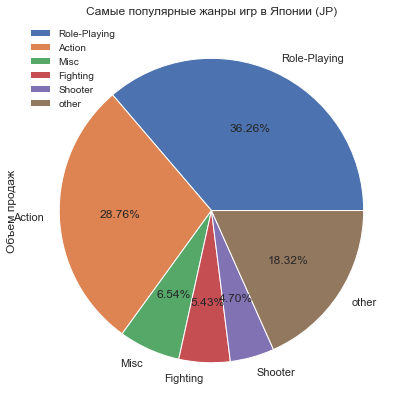

In [83]:
plt.style.use('seaborn-whitegrid')
jp_top_genres.plot(kind='pie', 
                   labels=jp_top_genres['genre'], 
                   y='jp_sales',
                   autopct='%.2f%%',
                   figsize=(9,7))
plt.legend(loc=2, prop={'size': 10})
plt.ylabel('Объем продаж')
plt.title('Самые популярные жанры игр в Японии (JP)');

Самыми популярными жанрами в Японии являются:
1. Role-Playing
2. Action
3. Misc
4. Fighting
5. Shooter.

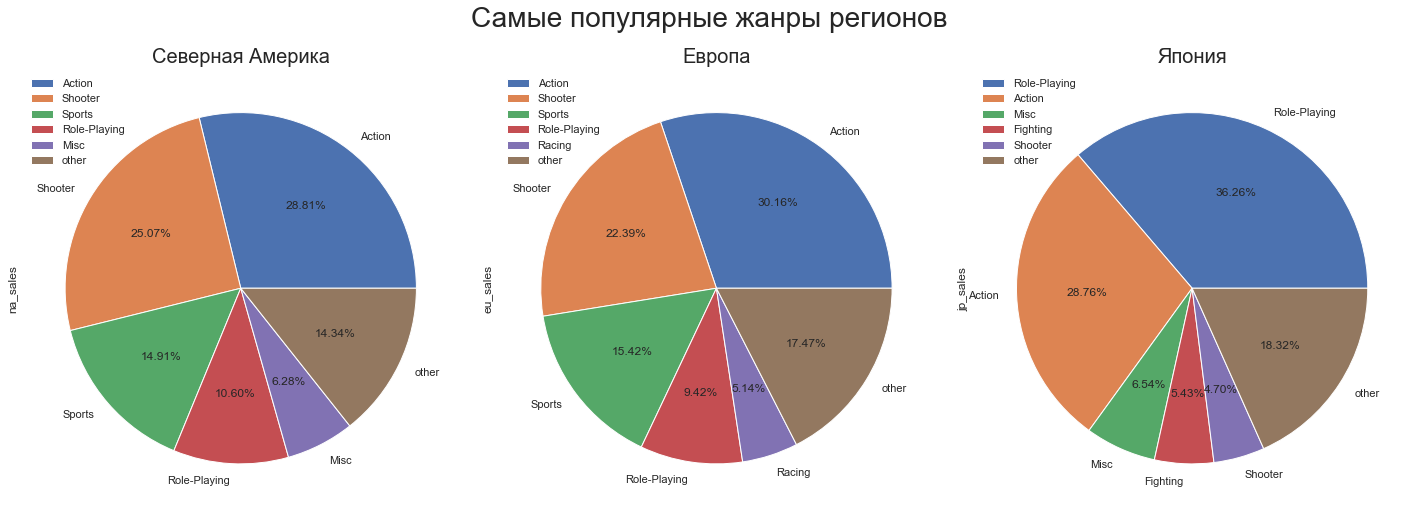

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

na_top_genres.plot(kind='pie', 
                      labels=na_top_genres['genre'], 
                      y='na_sales',
                      autopct='%.2f%%',
                      ax=axes[0])
eu_top_genres.plot(kind='pie', 
                      labels=eu_top_genres['genre'], 
                      y='eu_sales',
                      autopct='%.2f%%',
                      ax=axes[1])
jp_top_genres.plot(kind='pie', 
                      labels=jp_top_genres['genre'], 
                      y='jp_sales',
                      autopct='%.2f%%',
                      ax=axes[2])

fig.suptitle("Самые популярные жанры регионов", fontsize=28, verticalalignment='baseline')
axes[0].set_title('Северная Америка', fontsize=20)
axes[1].set_title('Европа', fontsize=20)
axes[2].set_title('Япония', fontsize=20)
axes[0].legend(loc=2)
axes[1].legend(loc=2)
axes[2].legend(loc=2)
plt.tight_layout()
plt.show()

[Назад к содержанию](#table_of_contents)

### 4.3. Влияние рейтинга ESRB на продажи в отдельном регионе <a class='anchor' id='step_4_3'></a>

Посмотрим, какие обозначения рейтинга ESRB используются в актуальном периоде.

In [85]:
actual_data['rating'].unique()

array(['M', 'other', 'E', 'T', 'E10+'], dtype=object)

Знаки рейтинга обозначают следующие возрастные категории:

- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. 
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

Рассчитаем топ-список рейтингов ESRB для Северной Америки.

In [86]:
na_top_rating = pd.DataFrame(actual_data.groupby('rating')['na_sales']
                             .agg('sum').sort_values(ascending=False)).reset_index().head()
na_top_rating['na_rank'] = pd.Series(range(1, len(na_top_rating) + 1))

na_top_rating

,rating,na_sales,na_rank
0,M,165.27,1
1,other,89.42,2
2,E,79.05,3
3,E10+,54.24,4
4,T,49.79,5


Рассчитаем топ-список рейтингов ESRB для Европы.

In [87]:
eu_top_rating = pd.DataFrame(actual_data.groupby('rating')['eu_sales']
                             .agg('sum').sort_values(ascending=False)).reset_index().head()
eu_top_rating['eu_rank'] = pd.Series(range(1, len(eu_top_rating) + 1))
eu_top_rating

,rating,eu_sales,eu_rank
0,M,145.57,1
1,E,83.36,2
2,other,78.91,3
3,E10+,42.69,4
4,T,41.95,5


Рассчитаем топ-список рейтингов ESRB для Японии.

In [88]:
jp_top_rating = pd.DataFrame(actual_data.groupby('rating')['jp_sales']
                             .agg('sum').sort_values(ascending=False)).reset_index().head()
jp_top_rating['jp_rank'] = pd.Series(range(1, len(jp_top_rating) + 1))
jp_top_rating

,rating,jp_sales,jp_rank
0,other,85.05,1
1,T,20.59,2
2,E,15.14,3
3,M,14.11,4
4,E10+,5.89,5


Выполним слияние полученных датафреймов, чтобы увидеть разницу рангов наглядно.

In [89]:
global_top_rating = na_top_rating.merge(eu_top_rating, on='rating').merge(jp_top_rating, on='rating')
global_top_rating

,rating,na_sales,na_rank,eu_sales,eu_rank,jp_sales,jp_rank
0,M,165.27,1,145.57,1,14.11,4
1,other,89.42,2,78.91,3,85.05,1
2,E,79.05,3,83.36,2,15.14,3
3,E10+,54.24,4,42.69,4,5.89,5
4,T,49.79,5,41.95,5,20.59,2


Изобразим объемы продаж в разбивке рейтингов по регионам.

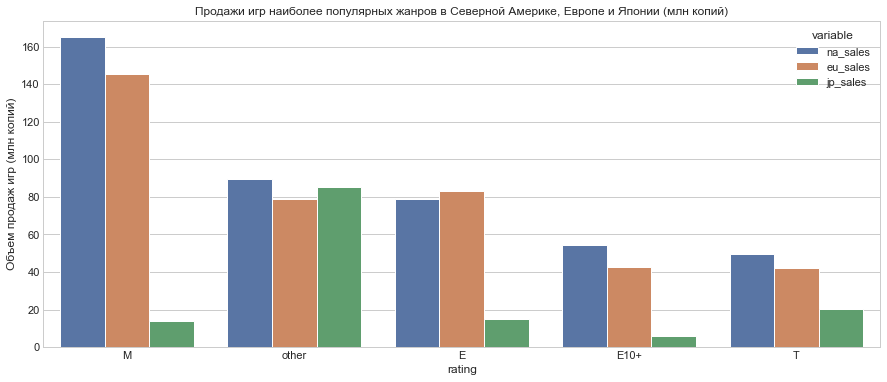

In [90]:
global_melted = global_top_rating.melt(id_vars='rating', value_vars=['na_sales', 'eu_sales', 'jp_sales'])
sns.barplot(data=global_melted, x='rating', y='value', hue='variable')
plt.title('Продажи игр наиболее популярных жанров в Северной Америке, Европе и Японии (млн копий)')
plt.ylabel('Объем продаж игр (млн копий)');

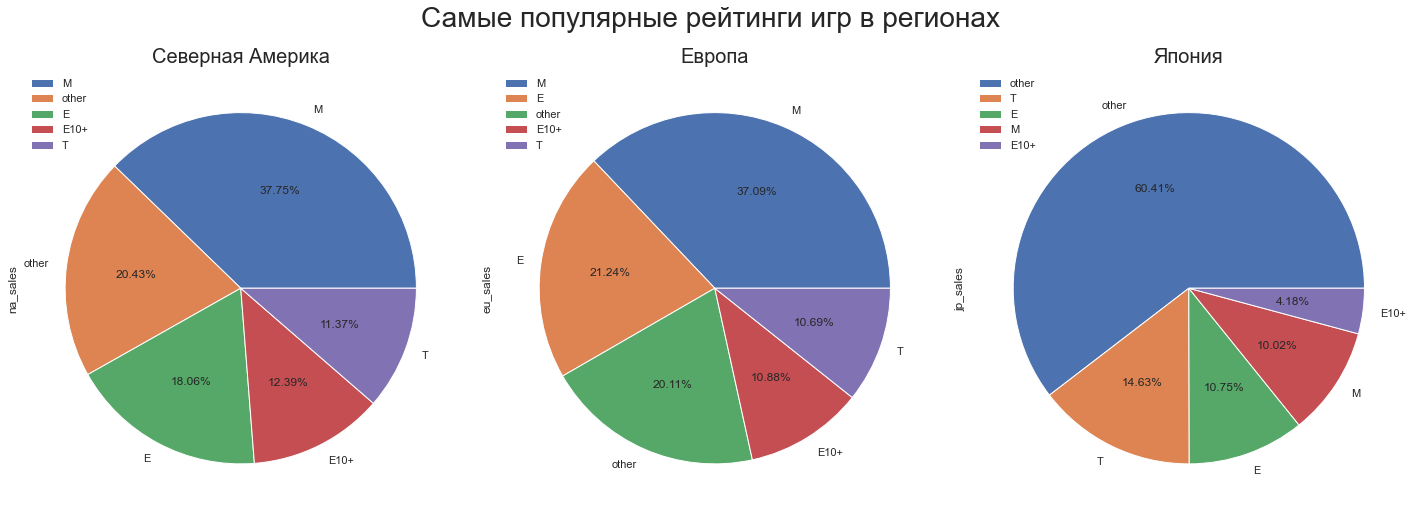

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

na_top_rating.plot(kind='pie', 
                      labels=na_top_rating['rating'], 
                      y='na_sales',
                      autopct='%.2f%%',
                      ax=axes[0])
eu_top_rating.plot(kind='pie', 
                      labels=eu_top_rating['rating'], 
                      y='eu_sales',
                      autopct='%.2f%%',
                      ax=axes[1])
jp_top_rating.plot(kind='pie', 
                      labels=jp_top_rating['rating'], 
                      y='jp_sales',
                      autopct='%.2f%%',
                      ax=axes[2])

fig.suptitle("Самые популярные рейтинги игр в регионах", fontsize=28, verticalalignment='baseline')
axes[0].set_title('Северная Америка', fontsize=20)
axes[1].set_title('Европа', fontsize=20)
axes[2].set_title('Япония', fontsize=20)
axes[0].legend(loc=2)
axes[1].legend(loc=2)
axes[2].legend(loc=2)
plt.tight_layout()
plt.show()

Как видно из сводной таблицы, в Северной Америке и Европе идентичная картина в плане популярности игр из определенных рейтингов. Самым популярным является жанр игр для лиц старше 17 лет. Однако, в Японии совершенно иная картина - самыми популярными играми являются игры без рейтинга (о котором нет сведений) и более младшего возраста.

Саггрегируем полученные данные и составим портрет каждого региона. В сводных таблицах поместим все полученные топ-списки (платформа, жанр, рейтинг).

Для Северной Америки игровой портрет региона будет выглядеть следующим образом.

In [92]:
na_portrait = na_top_platforms.merge(na_top_genres, 
                                     on='na_rank').merge(na_top_rating, 
                                                         on='na_rank', 
                                                         how='left')
na_portrait.set_index('na_rank')[['platform', 'genre', 'rating']].head().fillna('-')

,platform,genre,rating
na_rank,,,
1,PS4,Action,M
2,XOne,Shooter,other
3,X360,Sports,E
4,PS3,Role-Playing,E10+
5,3DS,Misc,T


Для Европы игровой портрет региона будет выглядеть следующим образом.

In [93]:
eu_portrait = eu_top_platforms.merge(eu_top_genres, 
                                     on='eu_rank').merge(eu_top_rating, 
                                                         on='eu_rank', 
                                                         how='left')
eu_portrait.set_index('eu_rank')[['platform', 'genre', 'rating']].head().fillna('-')

,platform,genre,rating
eu_rank,,,
1,PS4,Action,M
2,PS3,Shooter,E
3,XOne,Sports,other
4,X360,Role-Playing,E10+
5,3DS,Racing,T


Для Японии игровой портрет региона будет выглядеть следующим образом.

In [94]:
jp_portrait = jp_top_platforms.merge(jp_top_genres, 
                                     on='jp_rank').merge(jp_top_rating, 
                                                         on='jp_rank', 
                                                         how='left')
jp_portrait.set_index('jp_rank')[['platform', 'genre', 'rating']].head().fillna('-')

,platform,genre,rating
jp_rank,,,
1,3DS,Role-Playing,other
2,PS3,Action,T
3,PSV,Misc,E
4,PS4,Fighting,M
5,WiiU,Shooter,E10+


[Назад к содержанию](#table_of_contents)

## Шаг 5. Проверка гипотез <a class='anchor' id='step_5'></a>

### 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <a class='anchor' id='step_5_1'></a>

Проверим гипотезу о том, являются ли одинаковыми пользовательские рейтинги платформ Xbox One и PC.

Запишем выборки пользовательских оценок платформы Xbox One и PC в переменные `sample_xone` и `sample_pc` соответственно и очистим их от пропусков.

In [95]:
sample_xone = actual_data.query('platform == "XOne"')['user_score'].dropna()
sample_pc = actual_data.query('platform == "PC"')['user_score'].dropna()

Проверим, имеют ли данные выборки нормальное распределение с помощью графика QQ-plot.

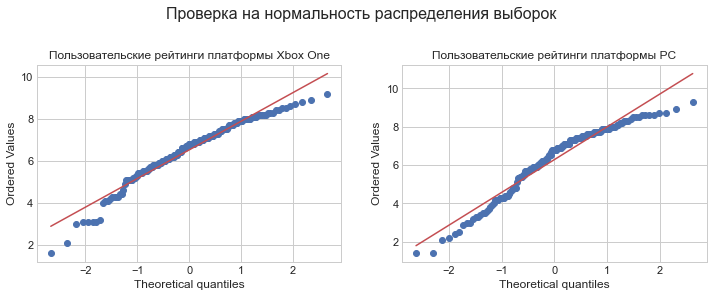

In [96]:
fig = plt.figure(figsize=(12,8))
fig.suptitle("Проверка на нормальность распределения выборок", fontsize=16)
ax1 = plt.subplot(2,2,1)
st.probplot(sample_xone, dist="norm", plot=plt)
ax2 = plt.subplot(2,2,2)
st.probplot(sample_pc, dist="norm", plot=plt)
ax1.title.set_text('Пользовательские рейтинги платформы Xbox One')
ax2.title.set_text('Пользовательские рейтинги платформы PC')
plt.show()

Мы видим сильное отклонение от красной линии на обоих графиках, а значит обе выборки имеют ненормальное распределение.

Проверим данное утверждение с помощью теста Шапиро-Уилка с уровнем значимости 0.05.

In [97]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(sample_xone))

Shapiro-Wilk normality test, W-statistic: 0.955055, p-value: 0.000015


In [98]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(sample_pc))

Shapiro-Wilk normality test, W-statistic: 0.941224, p-value: 0.000004


Тесты Шапиро-Уилка также подтвержают, что выборки не имеют нормального распределения.

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги платформ Xbox One и PC одинаковые}\\
   H_1 :\text{Средние пользовательские рейтинги платформ Xbox One и PC отличаются}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу. 

В ходе теста сделаем допущение, что дисперсии выборок не равны между собой.

In [99]:
alpha = 0.05

results = st.ttest_ind(sample_xone, sample_pc, equal_var=False)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.17156613829336056
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что с вероятностью 17% текущее различие между выборками можно получить случайно.

Значение p-value превышает уровень значимости, а значит у нас недостаточно оснований для отклонения нулевой гипотезы. Соответственно, средние пользовательские рейтинги платформ Xbox One и PC одинаковы. 

Поскольку выборки имеют ненормальное распределение, то помимо теста Стьюдента дополнительно мы можем применить непараметрический тест Манна-Уитни.
Он используется в случаях, если распределение случайных величины очень сильно отличается от нормального.

In [100]:
results = st.mannwhitneyu(sample_xone, sample_pc, alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5655160339922649
Не получилось отвергнуть нулевую гипотезу


Значение p-value превышает уровень значимости, а значит у нас также недостаточно оснований для отклонения нулевой гипотезы. Соответственно, по итогам тестов Стьюдента и Манна-Уитни подтверждается нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

[Назад к содержанию](#table_of_contents)

### 5.2. Средние пользовательские рейтинги жанров Action и Sports разные <a class='anchor' id='step_5_2'></a>

Проверим гипотезу о том, являются ли разными пользовательские рейтинги жанров Action и Sports.

Запишем выборки пользовательских оценок жанров Action и Sports в переменные `sample_action` и `sample_sports` соответственно и очистим их от пропусков.

In [101]:
sample_action = actual_data.query('genre == "Action"')['user_score'].dropna()
sample_sports = actual_data.query('genre == "Sports"')['user_score'].dropna()

Проверим, имеют ли данные выборки нормальное распределение с помощью графика QQ-plot.

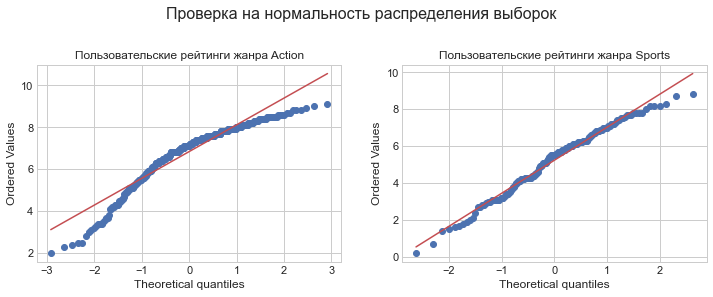

In [102]:
fig = plt.figure(figsize=(12,8))
fig.suptitle("Проверка на нормальность распределения выборок", fontsize=16)
ax1 = plt.subplot(2,2,1)
st.probplot(sample_action, dist="norm", plot=plt)
ax2 = plt.subplot(2,2,2)
st.probplot(sample_sports, dist="norm", plot=plt)

ax1.title.set_text('Пользовательские рейтинги жанра Action')
ax2.title.set_text('Пользовательские рейтинги жанра Sports')
plt.show()

Мы видим сильное отклонение от красной линии на обоих графиках, а значит обе выборки имеют ненормальное распределение.

Проверим данное утверждение с помощью теста Шапиро-Уилка с уровнем значимости 0.05.

In [103]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(sample_action))

Shapiro-Wilk normality test, W-statistic: 0.907428, p-value: 0.000000


In [104]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(sample_sports))

Shapiro-Wilk normality test, W-statistic: 0.981682, p-value: 0.032341


Тесты Шапиро-Уилка также подтвержают, что выборки не имеют нормального распределения.

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги жанров Action и Sports одинаковые}\\
   H_1 :\text{Средние пользовательские рейтинги жанров Action и Sports отличаются}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем p-value, используя `ttest` из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [105]:
alpha = 0.05

results = st.ttest_ind(sample_action, sample_sports, equal_var=False)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.1834440653354691e-20
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что с очень малой вероятностью текущее различие между выборками можно получить случайно.

Значение p-value намного ниже уровня значимости, а значит отклоняем нулевую гипотезу в пользу альтернативной. Соответственно, средние пользовательские рейтинги жанров Action и Sports различны. 

Поскольку выборки имеют ненормальное распределение, то помимо теста Стьюдента дополнительно применим непараметрический тест Манна-Уитни.

In [106]:
results = st.mannwhitneyu(sample_action, sample_sports, alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.1894191521874847e-23
Отвергаем нулевую гипотезу


Результаты тесты позволяют также отклонить нулевую гипотезу и принять альтернативную. Следовательно, средние пользовательские рейтинги жанров Action и Sports различны.

[Назад к содержанию](#table_of_contents)

## Выводы <a class='anchor' id='final'></a>

**Шаг 1. Загрузка данных и изучение общей информации.** На данном этапе были получены следующие выводы:
1. В датафрейме было обнаружено 16 715 строк. Из 11 столбцов 6 имели тип float64 - числа с плавающей точкой, остальные 5 имели строковые данные. В последних трех столбцах было заметно значительное количество пропусков.
2. Больше всего пропусков (более 40%) было найдено в столбцах, содержащих данные о рейтинге и оценках игр. Незначительное количество пропусков (1.6%) наблюдалось в столбце с данными о годе выпуска игры.
3. Дубликатов в датафрейме обнаружено не было.

**Шаг 2. Предобработка данных**. На данном этапе были получены следующие выводы:
1. Названия столбцов были приведены в нижний регистр, некоторые столбцы приведены к целочисленному формату данных.
2. Количество пропусков в столбце year_of_release было снижено с 269 до 244. Оставшиеся строки с пропусками были удалены из датафрейма.
3. В датафрейме было обнаружено 2 380 строк со значением "tbd" (14% столбца), которые в последствии были заполнены пропусками.
4. Суммарные продажи во всех регионах были записаны в отдельный столбец `total_sales`.

**Шаг 3. Исследовательский анализ данных.** На данном этапе были получены следующие выводы:

1. Наибольший пик выпуска игр приходился на период 2005-2011 гг. После 2011 года заметен существенный спад производства.
2. В список топ-10 консолей c самыми продаваемыми играми в мире по состоянию на 2016 г. попали продукты компании Sony (PlayStation, PlayStation 2, PlayStation 3, PlayStation 4), Microsoft (Xbox 360) и Nintendo (Wii, DS, 3DS, Game Boy Advanced).

3. PlayStation 2 - для консоли продано 1 248 млн копий игр, что является максимумом среди всех конкурентов и составляет 14% среди всех проданных игр.
4. Суммарная доля продаж всех консолей компании Sony составляет около 40% (более 3 512 млн копий игр для консолей PlayStation c 1994 по 2016 гг.).

5. Срок жизни большинства платформ составляет около 10 лет. Начиная с 2005 года, на рынке наблюдается очень тесная конкуренция множества платформ. До 2005 года - на рынке преобладает лидерство какой-то одной платформы: PlayStation в период 1995-2000 гг. и PlayStation 2 в период 2000-2005 гг. Как правило, спад продаж любой из платформ наблюдается через 2-3 года после запуска на рынок.

6. Платформы Nintendo чаще всего имеет срок жизни около 5 лет. Nintendo DS была одним из лидеров рынка на период 2004-2011 гг., уступив лидерство другой сверхуспешной консоле - Nintendo Wii. Эта платформа показала рекордные продажи игр среди всех продуктов компании Nintendo.

7. Жизненный срок консолей Microsoft составляет 8-11 лет.

8. На фоне падения продаж игр для всех устаревших консолей предыдущих поколений, на рынке наблюдается конкурентная борьба между PlayStation 4 и Xbox One, выход которых состоялся в 2013 году. Продажи для обеих платформ растут на протяжении двух лет, с 2013 г. по 2015 г., затем наблюдается их параллельный спад.

9. На основе полученных выводов, интервал 2013-2016 гг. был принят в качестве актуального периода для прогноза на 2017 год. Данный отрезок обусловлен выходом на рынок консолей нового поколения, следовательно, это событие будет ключевым и определяющим для игровой индустрии в последующие 5-10 лет.

10. Наибольшие суммарные продажи игр принадлежат платформе PlayStation 4 - с момента своего выхода в 2013 г. консоль успела обогнать всех конкурентов и выйти в лидеры.

11. В число потенциально прибыльных платформ входят PlayStation 4, Xbox One, Nintendo 3DS, PC.

12. Платформа персональных компьютеров показывает малые продажи игр по сравнению с консолями, однако их объем почти всегда стабилен - падение продаж игр не так критично. Платформу PC всегда следует рассматривать как потенциально прибыльную.

13. Платформы Nintendo 3DS и PC - демонстрировали падение на протяжении всего актуального периода (2013-2016 гг.). Платформы PlayStation 4 и Xbox One показывали существенный рост в первые два года своих продаж (2013-2015 гг.), после чего наблюдался их спад.

14. PlayStation 4 и Xbox One имеют схожие уровни продаж игр, в районе 200-220 тыс. копий игр - медианный тираж, которым чаще всего раскупаются игры на этих платформах.

15. Для платформ PC и Nintendo 3DS продажи новых игр составляют в районе 80-90 тыс. копий игр (медианный тираж).


16. Продажи в жанре "Action" показали самое стремительное падение в актуальном периоде - с 122 млн копий игр в 2013 году до 30 млн копий в 2016 году (падение объемов продаж в 4 раза).

17. К наиболее прибыльным жанрам относятся жанры "Shooter", "Sports", "Platform".

18. Наименьшую прибыльность показывают жанры "Strategy", "Puzzle", "Adventure". Продажи одной игры не превышают для этих жанров 30-80 тыс. копий.

**Шаг 4. Составление портрета региона.** На данном шаге были выявлены следующие черты регионов:

1. Предпочтения пользователей к игровым платформам различаются в зависимости от мирового региона. Рынки Европы и Северной Америки схожи, но сильно отличны от Японии.

2. Консоли семейства PlayStation продаются более успешно в Европе, в то время, как консоли Xbox продаются успешнее в Северной Америке. Консоли Nintendo более популярны в Японии.

3. Предпочтения к жанрам в целом схожи в Северной Америке и Европе, но отличаются от Японии.

4. В Северной Америке и Европе идентичная картина в плане популярности игр из определенных рейтингов. Самым популярным является жанр игр для лиц старше 17 лет. Однако, в Японии совершенно иная картина - самыми популярными играми являются игры без рейтинга (сведения о нем отсутствуют) и более младшего возраста.

**Шаг 5. Проверка гипотез.** На данном шаге были проверены следующие гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC равны - нулевая гипотеза не была отклонена. Для исследования использовались тест Стьюдента и Манна-Уитни. Выборки имели ненормальное распределение.
2. Средние пользовательские рейтинги жанров Action и Sports не равны - нулевая гипотеза о равенстве выборок была отклонена в пользу альтернативной. Для исследования использовались тест Стьюдента и Манна-Уитни. Выборки имели ненормальное распределение.

[Назад к содержанию](#table_of_contents)